## NumPy

[NumPy](https://numpy.org) (numerical python) forms the base in many Python libraries in different scientific fields because of its high performance implementation of multidimensional array called *ndarray*. NumPy features include:

- Vectorisation : array operations are applied to the entire array without python-level loops
- Memory : its own memory block independent of python's type checking and overhead
- Random number generation and distributions
- Linear algebra
- C API:  c-based user-defined and optimised algorithms
- etc.

 NumPy is a comprehensive Python library. The [API reference](https://numpy.org/doc/stable/reference/index.html) documents different categories of functions and attributes going beyond the scope of this course, so please treat it as a reference.

In [ ]:
import numpy as np

## Outline

- N-dimensional array : `ndarray`
- Arithmetic operations
- Broadcasting
- Indexing
- Combine arrays
- Numpy functions and array methods

## ndarray class

The main data structure of numpy is *ndarray*, a multidimensional array of homogeneous data (single type).

<br>

```
                 axis-0
           ------------------>
           -------------------
           |  0  |  1  |  2  |             1-dimensional array
           -------------------

                 axis-1
           ------------------>
           -------------------
         | | 0,0 | 0,1 | 0,2 |
 axis-0  | | 1,0 | 1,1 | 1,2 |             2-dimensional array
         | | 2,0 | 2,1 | 2,2 |
           -------------------


```

The layout of the n-dimensional array with $n>2$ on the screen may be daunting. You may skip viewing the data and refer to the data attributes such as *shape*, *ndim* and *dtype*. However, if you do want to inspect the data then the rule is: peel off square brackets from lower dimensions towards higher dimensions deep within. For example the 3-dimensional array of shape (1,3,4) has:
<br>

 ```
 [                      # 1st dimension with size=1
  [                     # 2nd dimension with size=3
    [0., 0., 0., 0.],   # 3rd dimension with size=4
    [0., 0., 0., 0.],   # 3rd ...
    [0., 0., 0., 0.]    # 3rd ...
  ]
]
 ```


### np.array

The NumPy function *array* is used to create an array:

**Synopsis:**    <tt>array(object, dtype=None)</tt>

where object is any (nested) sequence, e.g. list, tuples. The type is automatically determined if not provided explicitly, however you may force the type by setting *dtype* argument. Below is a summary of possible types:
<br>

```
    integers : {i|u}{1|2|4|8}   ;  Where i and u represent signed and unsigned integer.
    floats   : {f}[{2,4,8}] | d ;  Where 2,4,8 represent half,single and double precision.
                                   f and d alone stand for single and double precision
                                   respectively.
    boolean  : ? | bool
    object   : O | object
```

**Examples:**

In [ ]:
# 1D
arr1d = [[1,2,3], range(1,4), (1,2,3)]
[np.array(arr) for arr in arr1d]

# 2D
arr2d = [ [[1,2,3],[4,5,6]],          # list of lists
          [range(1,4), range(4,7)],   # list of ranges
          ((1,2,3),(4,5,6))           # tuple of tuples
          ]
[np.array(arr) for arr in arr2d]

# reshape, zeros, ones, empty
np.array([0,2,1,6]).reshape((2,2)) # 2-dimensional array
np.zeros(shape=(1,3,4))      # 3-dimensional array filled with 0's
np.ones(shape=(1,3,4))       # 3-dimensional array filled with 1's

### Sequences

We have already encountered some use-cases of python `range`. There is a similar function `arange` in Numpy, the difference is that python `range` returns an instance of the class *range* whereas `arange` returns `ndarray`.

In [ ]:
np.arange(10)                    # 0..9 of  ; type int64
np.arange(0, 10, dtype=np.int8)  # 0..9 of  ; type int8
np.arange(0., 10)                # 0.0..9.0 ; type float64
np.arange(0, 10, dtype="f2")     # 0..9 of  ; type float16
np.arange(0, 10)                 # 0..9 of  ; type int64
np.arange(0, 10, 3)              # 0,3,6,9  ; type int64

### numpy.repeat / numpy.tile

In [ ]:
np.repeat(np.array([0,1,2]),3)
np.tile(np.array([0,1,2]),3)

### Inspect ndarray

Basic attributes to inspect an array are `ndim`, `shape`, `dtype`, `size`:

In [ ]:
arr = np.arange(8).reshape(2,2,2)
arr.ndim, arr.shape, arr.dtype, arr.size

### Basic aggregate functions

Here is a table of aggregate functions available in the NumPy (`np`) module, which can be applied to `ndarray` objects:

| **Function**       | **Description**                                                                 |
|--------------------|---------------------------------------------------------------------------------|
| `np.sum`           | Calculates the sum of array elements.                                          |
| `np.min`           | Finds the minimum value in the array.                                          |
| `np.max`           | Finds the maximum value in the array.                                          |
| `np.mean`          | Computes the mean (average) of the array elements.                             |
| `np.average`       | Computes the weighted average of the array elements.                           |
| `np.prod`          | Calculates the product of array elements.                                      |
| `np.median`        | Finds the median value in the array.                                           |
| `np.std`           | Computes the standard deviation of the array elements.                         |
| `np.var`           | Computes the variance of the array elements.                                   |
| `np.argmin`        | Returns the index of the minimum value in the array.                           |
| `np.argmax`        | Returns the index of the maximum value in the array.                           |


**Argument axis={0,1}** in 2d case:

- `axis=0`: Aggregate along the rows (i.e., operate **down a column**). The result is computed column-wise.
- `axis=1`: Aggregate along the columns (i.e., operate **across a row**). The result is computed row-wise.
- `axis=None` (default): Aggregate over **all elements** in the array.

With dimensions $>2$, with axis $j$ aggregate along the $j_{th}$ dimension.

Most of the functions are also available as ndarray functions. For example take the `mean` function:

In [ ]:
arr = np.array([3,7,3,1,8,5])
arr.mean(), np.mean(arr)

In addition, NumPy functions give you control with the axis argument to decide the direction of calculation. Take the function mean:

In [ ]:
#
rng = np.random.default_rng(12345)
arr2d = rng.integers(0,10,2*2).reshape(2,2)
arr2d

In [ ]:
np.mean(arr2d)         # total mean
np.mean(arr2d, axis=0) # mean along the 0-axis (1st dimension)
np.mean(arr2d, axis=1) # mean along the 1-axis (2nd dimension)

**Boolean** Two common boolean aggregate functions are `all` and `any`, testing whether all or any of the values are True respectively. For example, take the array below, we want to know whether there are values above a certain threshold, say 50:

In [ ]:
arr1d = rng.integers(0,99,50) #
(arr1d > 50).any()           # Are there any values >50?
(arr1d > 50).all()            # Are all values >50?

The aggregate function `sum` can consume boolean arrays and produce the total number of truth values:

In [ ]:
(arr1d > 50).sum()           # How many values >50

Some functions such as `median`, `percentile` and `quantile` are only available at NumPy module level due to their complexity. Most `ndarray` functions are wel-optimised at low-level whereas complex functions such as `median` having sorting as part of the algorithm do not lend themselves to the philosophy behind `ndarray`.

In [ ]:
arr = np.arange(10)
np.median(arr), np.percentile(arr, 50), np.quantile(arr, 0.5)

## Arithmetic operations

Arithmetic operations between numpy arrays are vectorised, meaning that given arrays with the same shape the operation is carried out element-wise. Similarly, operations between a numpy array and a scalar are also vectorised.

In [ ]:
# array and scalar
np.arange(5) + 10 # add 10 to each element in the array
np.arange(5) ** 2 # raise all values in range 0..4 to the power of 2

In [ ]:
# element-wise
np.array([4,3,2,1,0]) + np.array([0,1,2,3,4])
np.array([4,3,2,1,0]) * np.array([0,1,2,3,4])


In [ ]:
# NumPy functions vectorized
np.sqrt( np.square(np.arange(8).reshape(4,2))) # the square-root of square
np.abs(np.array([-1,2,-3])) # absolute value: |x|

**Broadcasting** enables carrying out operations between arrays with different shapes:


In [ ]:
arr1d = np.array([2,2,2,2])
arr2d = np.arange(8).reshape(2,4)
arr1d + arr2d

Array are compatible for broadcast if corresponding dimensions (aligned from high to low dimension) of both arrays have the same size or at least one has size=1. Example above:

```
arr2d : 2, 4
arr1d : 1, 4
```

**Broadcasting rules:**

- If number of dimensions are unequal then prepend ones to the shape of the smaller array.
- The sizes of the arrays along each dimension must either be equal or one of them must be 1.
- The resulting shape is the maximum size along each dimension from the input arrays


#### C or Fortran order

Two ways to fill an `ndarray` with values:

- 'C' (row-wise) the values are filled along the last axis (default)
- 'F' (column-wise) the values filled from first axis first to the last axis.

In [ ]:
arr2c = np.arange(4).reshape((2,2),order='C') # row-wise (default)
arr2f = np.arange(4).reshape((2,2),order='F') # column-wise

`order='C'`:

```
[...]
```

`order='F'`:

```
[...]
```

**Multiple assignments**

In [ ]:
arr3d = np.arange(8).reshape((2,2,2)) # 3-dimensional array
arr3d

In [ ]:
# systematically access subsets
plane0, plane1 = arr3d
vec0, vec1 = plane0
vec2, vec3 = plane1
# shortcut: layout the structure
[[v0,v1],[v2,v3]] = arr3d

**Matrix operations**

In [ ]:
m1 = np.array([[1, 2], [3, 4]])
m2 = np.array([[5, 6], [7, 8]])
# element-wise operations
m1 + m2 # as well as {-,*,/}
# matrix multiplication
np.dot(m1, m2)
m1 @ m2
# Transpose
m1.T
# Flatten
m1.flatten() # copy
m1.ravel()   # view

## Exercise

### Create arrays

- 1-dimensional array over the range 11, 14, 17, 20, ..., 50. In addition show the type, size, shape and number of dimensions of the array.
- 2-dimensional array of boolean type with shape=(5,3) and all set to False.
- 2-dimensional array of shape=(9,3) of the alphabet a..z.
- The two 3-dimensional arrays are filled with identical data but different orders. Without running the code predict the layout of the array.

```Python
arr_c = np.array([ 5,  9, 16, 12,  3, 14, 11, 13]).reshape((2,2,2), order='C')
arr_f = np.array([ 5,  9, 16, 12,  3, 14, 11, 13]).reshape((2,2,2), order='F')
```
`order='C'`:

```
[...]
```

`order='F'`:

```
[...]
```

### Array indices

- Given the 2-dimensional array *arr2d* below, fetch the following elements fetch:
    - single elements:  'e', 'g'
    - [e,f]
    - [h,e,b]
    - [h,i]
    - [d,b,f,h]

```Python
arr2d = np.array(list("abcdefghi")).reshape(3,3)
arr3d = np.arange(3*3*3).reshape(3,3,3)
```

- Given the 3-dimensional array arr3d:
    - fetch:
        - [[19,20],[22,23]]
        - [[9,12,15],[11,14,17]]
    - swap
        - on axis-0 the 2nd and the 3rd elements
        - the 1st and the 3rd element of all elements on axis-0
        - repeat the previous swap but now only on the 1st element of axis-0
- Make a copy of `arr3d` from previous exercise and set its odd values to -1.
- Implement the function *identity_(n)* that generates the identity matrix of size *n*. You can check you results with the build-in `numpy.identity` function.
- Create the array [5, 5, 5, 3, 3, 3, 5, 7, 5, 7, 5, 7] (ref: numpy.repeat, numpy.tile)
- Create a (8,8) two-dimensional array to represent a chessboard filled with 0 and 1 representing black and white squares respectively. Make sure the orientation is correct with leading diagonal set to white.
- Implement the following function `grid_x` based on the description below. Make use of numpy functions and vectorisation capability to avoid looping.

```
Generates a 2D grid of specified size (n x n) with an 'X' shape pattern
represented by "#" symbols. All other cells in the grid are represented
by ".". The function will return (n x n) numpy.ndarray containing the X
pattern.
```



- (*) **Tic-tac-toe** is a classic two-player game played on a 3x3 grid. Players take turns marking empty squares, one with an "X" and the other with an "O". The objective is to be the first to form a horizontal, vertical, or diagonal line of three consecutive marks. If all squares are filled without achieving this, the game ends in a draw.

- Implement the class TicTacToe with a method `play`. It is an interactive game, a possible scenario:

```
ttt = TicTacToe() # TicTacToe instance 'ttt'
[out]
0 | 0 | 0
---------
0 | 0 | 0
---------
0 | 0 | 0
Player 1's turn:

ttt.play((0,0)) # player 1
[out]
1 | 0 | 0
---------
0 | 0 | 0
---------
0 | 0 | 0
Player 2's turn:

ttt.play((0,1)) # player 2
[out]
1 | 2 | 0
---------
0 | 0 | 0
---------
0 | 0 | 0
Player 1's turn:

...
...

Player 1's turn:
1 | 2 | 2
---------
0 | 1 | 0
---------
0 | 0 | 1
Winner is player 1
```

- Upgrade the class to enable playing against the computer, a random move will suffice.


(*) Optional.

## Random number generation

Numpy has `np.random` module has many functions for random number generation but they are superseded by [Random Generator](https://numpy.org/doc/stable/reference/random/generator.html). The `np.random.Generator` provides a more advanced and flexible random number generation functions than the legacy `np.random`. Below is a comparison:

| **Legacy `np.random` (Global State)** | **Modern `np.random.Generator` (Recommended)** |
|---------------------------------|----------------------------------|
| `np.random.rand(d0, d1, …)` | `rng.random((d0, d1, …))` |
| `np.random.randn(d0, d1, …)` | `rng.standard_normal((d0, d1, …))` |
| `np.random.randint(low, high, size)` | `rng.integers(low, high, size)` |
| `np.random.random(size)` | `rng.random(size)` |
| `np.random.uniform(low, high, size)` | `rng.uniform(low, high, size)` |
| `np.random.normal(loc, scale, size)` | `rng.normal(loc, scale, size)` |
| `np.random.binomial(n, p, size)` | `rng.binomial(n, p, size)` |
| `np.random.poisson(lam, size)` | `rng.poisson(lam, size)` |
| `np.random.choice(a, size, replace)` | `rng.choice(a, size, replace)` |
| `np.random.permutation(arr)` | `rng.permutation(arr)` |
| `np.random.seed(seed)` | `rng = np.random.default_rng(seed)`|


Major difference in terms of reproducibility:

- `np.random` functions operate on a *global random state* (not recommended).

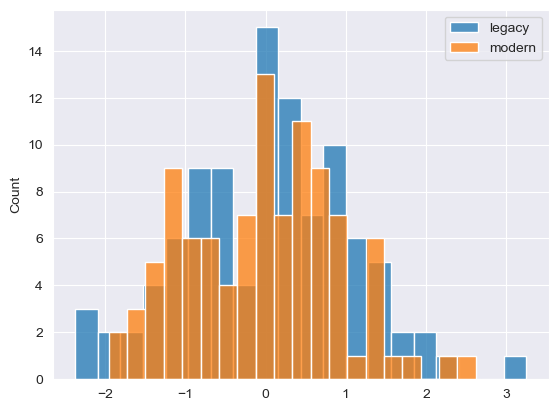

In [47]:
# Example: plot distributions
# Normal distribution: n=100, mean=0, sd=1
#
# np.random
np.random.seed(12345)
legacy = np.random.normal(loc=0.0, scale=1.0, size=100)
# Generator
rng = np.random.default_rng(12345)
modern = rng.normal(loc=0.0, scale=1.0, size=100)

# Plot histograms
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(legacy, label='legacy',bins=20)
sns.histplot(modern, label='modern',bins=20)
plt.legend()
plt.show()

## Indexing

### Basic index

Indexing 1-dimensional array is similar to python lists:


In [ ]:
arr1 = np.arange(10)  # arr1 : 0..9
arr1[3:8:2]           # fetch values from 3..8 in steps of 2

> Views: One major difference between lists and arrays is that array slices are `views` of the original array and list slices are copied.

To illustrate, the following creates arr2 array as a view to arr1 range. Any change to arr2 will change arr1 and any change in arr1 will be reflected in arr2:

In [ ]:
arr2 = arr1[0:5]  # arr2 : slice from  0 to 4th element
arr2[2:] = 1234   # set arr2 values to 1234 over the range 2:
arr1[0:2] = 4321  # changes in arr1 are reflected in arr2

If you prefer a copy instead of view use the method copy to create a new copy of the array slice:

In [ ]:
arr2 = arr1[0:5].copy() # changes to **arr2** will not propagate to **arr1**.

> Slice [:] signifies the entire arrays.

The following assignment is valid in arrays but not in lists:



In [ ]:
arr1 = np.arange(10)  # arr1 : 0..9
arr1[:] = 10          # set the entire array arr1 to value 10

### Indexing in higher dimensions


In [ ]:
arr3d = np.arange(8).reshape(2,2,2)
arr3d

Indexing in higher dimensions is done with square brackets and comma-separated indices over dimensions
$d_1,\cdots,d_j$ with  $1 < j \leq n$. The results will be the dimensions $\leq j$.

In the example below only the first two axes 0 and 1 are considered:

In [ ]:
arr3d[0]    # 0th element on axes 0
arr3d[0,1]  # 0st element on axes 0, 1st element on axis 1

The above example arr3d[0,1] states: retrieve all values with indices (0,1) as their prefix, i.e. [0,1,0] and [0,1,1]:

In [ ]:
arr3d[0,1,0], arr3d[0,1,1]

Indexing with composition also works, but using comma-separated indices is more concise:

In [ ]:
arr3d[0][1] # composition : first retrieve arr3d[0] array and access index 1 ; <=> arr3d[0,1]

Passing slices as indices in arrays with dimensions behaves in the similar way as basic indices. Below is a review of slices:


| **slice** | **index**          |
|-----------|--------------------|
| `[:]`     | $0 .. (n-1)$       |
| `[:i]`    | $0 .. (i-1)$       |
| `[i:]`    | $i .. (n-1)$       |
| `[i:j]`   | $i .. (j-1)$       |
| `[i:j:k]` | $i\times k.. j//k$ |
| `[-i]`    | $n-i)$             |
| `[-i:]`   | $(n-i) .. (n-1)$   |
| `[:-i]`   | $0 .. (n-i)$       |
| `[::-1]`  | $(n-1) .. 0$       |


Slicing can be done over multiple dimensions with slices separated by comma:


In [ ]:
arr2d = np.arange(4*2).reshape(4,2)
arr2d[:,:]     # fetch all, same as arr2d
arr2d[2:,1]    # fetch 2: on axis-0 and 2nd on axis-1
arr2d[[0,2],:] # fetch 1st and 3rd element on axis-0 and all on axis-1
np.arange(4*2).reshape(4,2)[:,::-1] # reverse second dimension

###  Boolean index (mask)

Comparing arrays with relational operators <, <=, =, !=, >, >= and ~ will result into a boolean array, also termed as a mask. It is used to get or set values in array as logical condition.

Here we only show array and scaler comparison, higher dimension comparison follows the broadcasting rules.

In [ ]:
arr1d = np.arange(10)
arr1d[arr1d % 2 == 0]       # filter out even numbers
arr1d[arr1d % 2 == 0] = -1  # set even numbers to -1

### Fancy indexing
Fancy indexing refers to a way to access elements in an array using arrays (or other sequences, e.g. nested lists) as indices, rather than simple slices or integers. It can be used to retrieve arbitrary subsets, not necessarily contiguous, as opposed to slices which return sub-regions. The result is new array an not a view.


In [ ]:
arr = np.array([[10, 20, 30, 40],
                [50, 60, 70, 80],
                [90, 100, 110, 120]])

arr[[0, 2, 1], [0, 2, 1]]

Broadcasting is applied If shape of the indices do not match:

## Combine arrays

Combining array is carried out based on the axes and on the number of dimensions and/or shapes. NumPy provides several functions for this purpose.

Concatenate function takes a sequence of arrays and produces a combined array with the same number of dimensions but different shape. The following two 1-dimensional arrays:

In [ ]:
arr1 = np.arange(0,5)
arr2 = np.arange(5,10)
np.concatenate((arr1,arr2))

In a 1-dimensional array there is only the axis 0 and the default choice to concatenate. With a 2-dimensional array we have the axes 0 (rows) and 1 (columns). The concatenation succeeds if the dimensions on the axis on which it takes place match.

In [ ]:
arr1 = np.arange(0,8).reshape(4,2)
arr2 = np.arange(8,16).reshape(4,2)
np.concatenate((arr1, arr2))          # along axis=0 (default) ; alternatively use vstack
np.concatenate((arr1, arr2), axis=1)  # along axis=1           ; alternatively use hstack

**numpy.stack** function combines arrays in a newly introduced dimension along the given axis (default axis=0):



In [ ]:
arr1 = np.arange(0,4).reshape(2,2)
arr2 = np.arange(4,8).reshape(2,2)
np.stack((arr1, arr2), axis=1)

## Numpy API Reference

Under the [Mathematical function](https://numpy.org/doc/stable/reference/routines.math.html), [Statistics](https://numpy.org/doc/stable/reference/routines.statistics.html), [Linear algebra](https://numpy.org/doc/stable/reference/routines.linalg.html) sections of [NumPy API Reference](https://numpy.org/doc/stable/reference/index.html) you'll find many useful functions.


## Exercises

- Create a 1-dimensional array of random integers, range [0,100), of size 20. Test (True or False) whether the array contains any odd integers. Finally, count the number of odd integers.

- Summary

1. Create a two-dimensional array of random integers over the range [0,100) with shape (8,4).
2. Calculate the following summaries on axis=0:

    - minimum, maximum, mean and median
    - 1st and 3rd quartile.

3. Write the function *summary* which takes a 2-dimensional array as input and produces an R like summary as shown below:

```
       0              1               2               3
 Min.   :13.0   Min.   :24.00   Min.   :10.00   Min.   :11.00
 1st Qu.:42.5   1st Qu.:40.75   1st Qu.:46.00   1st Qu.:26.00
 Median :67.0   Median :76.50   Median :71.00   Median :34.50
 Mean   :60.0   Mean   :67.12   Mean   :64.75   Mean   :42.88
 3rd Qu.:81.5   3rd Qu.:93.00   3rd Qu.:95.00   3rd Qu.:61.25
 Max.   :97.0   Max.   :97.00   Max.   :98.00   Max.   :86.00
```

- Implement the function *mat_mult* which takes two 2-dimensional arrays and produces their product. Compare your results with the NumPy built-in operator '@'. Make sure that the function raises an exception if the matrix dimensions are incompatible.